In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab

from pandas import Series, DataFrame

%matplotlib inline

In [2]:
#Load US and UK Inflation and Unemployment data
Maindata=pd.read_excel('UK US Inflation & Unemployment 1964 - 2009.xls')
Maindata=Maindata.rename(columns={'w':'Year','uki':'UK Inflation', 'usi':'US Inflation',
                         'usu':'US Unemployment','uku':'UK Unemployment'})
Maindata=Maindata.drop({'gi', 'gu'},1)
Maindata=Maindata.set_index('Year')
Maindata.head()

#Load Bank of England Data for GDP and Interest rates
BoE=pd.read_excel('BoE Data.xlsx')
BoE=BoE.set_index('Year')
BoE=BoE.rename(columns={'Bank Rates':'UK Base Rate'})
BoE=BoE.drop({'GDP'},1)
BoE.head()

#Load US Federal Reserve Interest Rates
FedRates=pd.read_excel('Federal Reserve Funds 1955-2015.xls')
FedRates=FedRates.rename(columns={'FEDFUNDS':'US Base Rate'})
FedRates['Year']=DataFrame(np.arange(1955,2016,1).reshape(61,1), index=FedRates.index)
FedRates= FedRates.drop('observation_date',1)
FedRates=FedRates.set_index('Year')
FedRates.head()

#Combine the data sets
Overall=pd.concat([BoE, FedRates, Maindata], axis=1)

#Remove rows with any missing values
OverallUK=Overall.ix[:,['UK Base Rate',
                     'UK Inflation','UK Unemployment']]
OverallUK=OverallUK.dropna(axis=0, how='any')

OverallUS=Overall.ix[:,['US Base Rate', 
                        'US Inflation', 'US Unemployment']]
OverallUS=OverallUS.dropna(axis=0, how='any')

Overall=pd.concat([OverallUS, OverallUK], axis=1)
#Overall=Overall.dropna(axis=0, how='any')
Overall=Overall.ix[:,['US Base Rate', 'UK Base Rate', 
                        'US Inflation', 'UK Inflation',
                     'US Unemployment', 'UK Unemployment']]

#Round each value to 1DP for uniformity and present table
Overall=Overall.round(1)


In [55]:
OverallUS=OverallUS.round(1)
OverallUS.head()

,US Base Rate,US Inflation,US Unemployment
Year,,,
1955,1.8,0.0,4.4
1956,2.7,1.5,4.1
1957,3.1,3.3,4.3
1958,1.6,2.8,6.8
1959,3.3,0.7,5.4


In [56]:
OverallUK=OverallUK.round(1)
OverallUK.head()

,UK Base Rate,UK Inflation,UK Unemployment
Year,,,
1871,3.0,1.7,1.5
1872,5.0,4.5,0.9
1873,5.5,3.1,1.0
1874,6.0,-3.4,1.6
1875,4.0,-2.2,2.1


In [6]:
OverallUK.describe().round(1)

,UK Base Rate,UK Inflation,UK Unemployment
count,139.0,139.0,139.0
mean,5.4,3.1,5.2
std,3.2,5.4,3.4
min,0.5,-15.0,0.4
25%,3.0,0.1,2.2
50%,5.0,2.0,4.7
75%,6.0,4.9,7.4
max,17.0,22.5,15.6


In [7]:
Overall.ix[Overall['UK Inflation'] > 15, 'UK Inflation'] = Overall['UK Inflation'].mean()
Overall.ix[Overall['UK Inflation'] < -5, 'UK Inflation'] = Overall['UK Inflation'].mean()

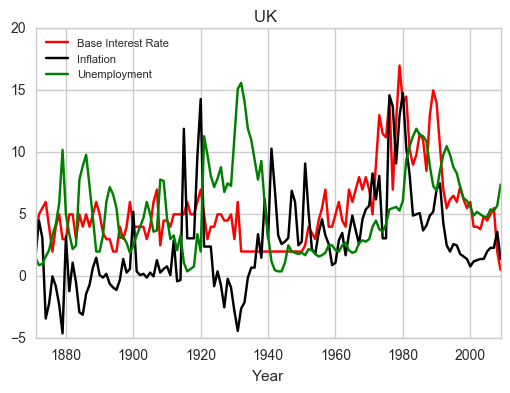

In [102]:
#matplot lib graphs

fig=plt.plot(Overall.index,Overall['UK Base Rate'], color='r', label='Base Interest Rate')
fig=plt.plot(Overall.index, Overall['UK Inflation'], 'k',label='Inflation')
fig=plt.plot(Overall.index, Overall['UK Unemployment'], 'g', label='Unemployment')
plt.xlim(1871,2009)
plt.legend(loc='best',prop={'size':8})
plt.xlabel('Year')
plt.title('UK ')
#pylab.ylim([0,25])
plt.savefig('Rate v Inf UK .jpg')

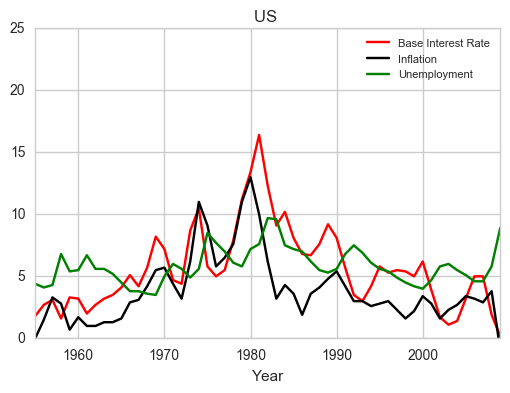

In [52]:
fig=plt.plot(OverallUS.index, OverallUS['US Base Rate'], color='r', label='Base Interest Rate')
#fig=plt.plot(OverallUS.index, OverallUS['US GDP Change'], 'b', label='GDP Change')
fig=plt.plot(OverallUS.index, OverallUS['US Inflation'], 'k',label='Inflation')
fig=plt.plot(OverallUS.index, OverallUS['US Unemployment'], 'g', label='Unemployment')
plt.xlim(1955,2009)
plt.legend(loc='best',prop={'size':8})
plt.xlabel('Year')
plt.title('US ')
pylab.ylim([0,25])
plt.savefig('Rate v Inf US .jpg')

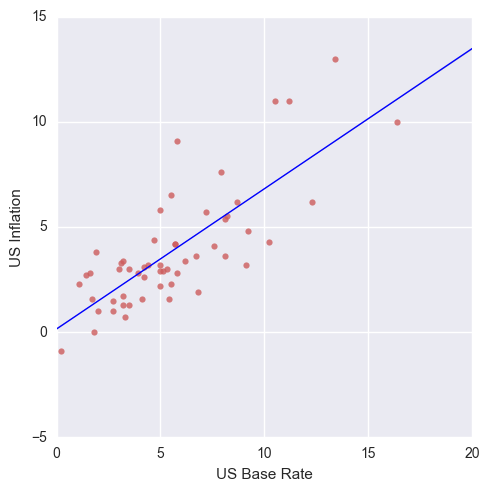

In [27]:
# seaborn 

sns.lmplot('US Base Rate', 'US Inflation', Overall,
          scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':1,'color':'blue'},ci=1, order=1)
pylab.xlim([0,20])
plt.savefig('Rate v Inf US Regress .jpg')

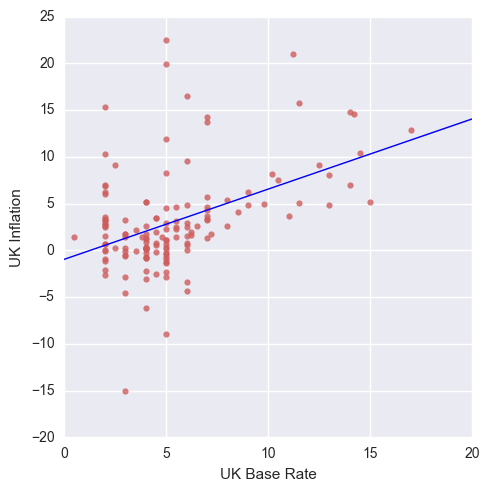

In [28]:
# seaborn 

sns.lmplot('UK Base Rate', 'UK Inflation', Overall,
          scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':1,'color':'blue'},ci=1, order=1)
pylab.xlim([0,20])
plt.savefig('Rate v Inf UK Regress .jpg')

/Users/IzzIbrahim/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


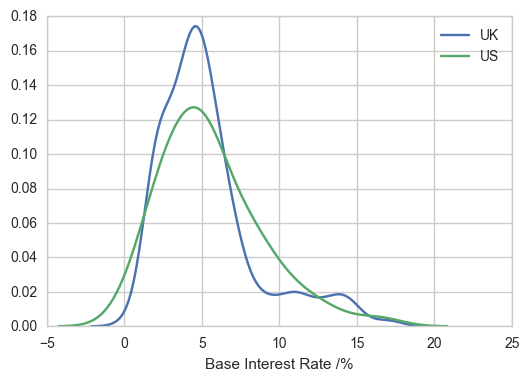

In [61]:
dist=sns.kdeplot(OverallRate['UK'], kernel='gau')
dist=sns.kdeplot(OverallRate['US'], kernel='gau')
dist.set(xlabel='Base Interest Rate /%')
plt.savefig('Distribution .jpg')

In [3]:
X=Maindata['UK Unemployment']
Y=Maindata['UK Inflation']


print (stats.stats.spearmanr(X, Y)[0])


-0.314409831436


In [131]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.stats.linregress(x, y)
    return r_value**2

rsquared(Overall['US Base Rate'], Overall['US Inflation'])

nan

In [54]:
#Calculate R

Y=Overall['US Inflation'].sum()
Y2= (Overall['US Inflation'])**2
Y22=Y2.sum()
X=Overall['US Base Rate'].sum()
X2=Overall['US Base Rate']**2
X22=X2.sum()
n=Overall['US Base Rate'].count()
XY=(Overall['US Base Rate']*Overall['US Inflation']).sum()

r=((n*XY)-(X*Y))/((((n*X22)-(X**2))*((n*Y22)-(Y**2)))**.5)
r

0.78129072483870576

In [128]:
#Calculate R for unemployment vs gdp

Y=Overall['US Inflation'].sum()
Y2= (Overall['US Inflation'])**2
Y22=Y2.sum()
X=Overall['US Base Rate'].sum()
X2=Overall['US Base Rate']**2
X22=X2.sum()
n=Overall['US Base Rate'].count()
XY=(Overall['US Inflation']*Overall['US Base Rate']).sum()

r=((n*XY)-(X*Y))/((((n*X22)-(X**2))*((n*Y22)-(Y**2)))**.5)
r

0.78129072483870576

In [129]:
#box plot
OverallUn=Overall.ix[:,['UK Unemployment', 'US Unemployment']]
OverallIn=Overall.ix[:,['UK Inflation', 'US Inflation']]
OverallRate=Overall.ix[:,['UK Base Rate', 'US Base Rate']]
OverallGD=Overall.ix[:,['UK GDP Change', 'US GDP Change']]

OverallUn=OverallUn.rename(columns={'UK Unemployment':'UK', 'US Unemployment':'US'})
OverallIn=OverallIn.rename(columns={'UK Inflation':'UK', 'US Inflation':'US'})
OverallRate=OverallRate.rename(columns={'UK Base Rate':'UK', 'US Base Rate':'US'})
OverallGD=OverallGD.rename(columns={'UK GDP Change':'UK', 'US GDP Change':'US'})




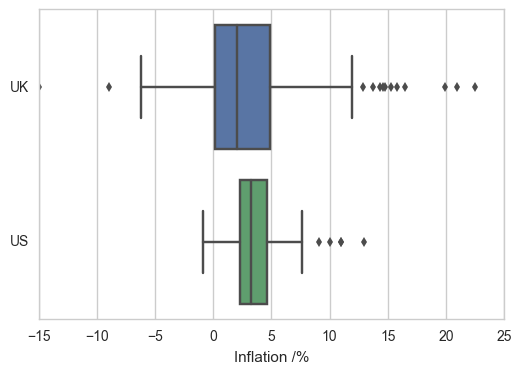

In [130]:
sns.set_style("whitegrid")
box=sns.boxplot(data=OverallIn, orient='h')
box.set(xlabel='Inflation /%')
plt.savefig('Box Inflation w Outlier.jpg')

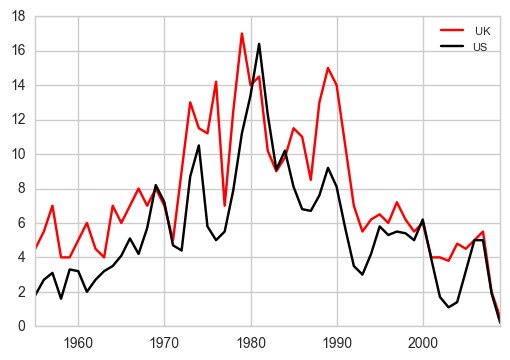

In [38]:
#US vs UK vase rate

fig=plt.plot(Overall.index,Overall['UK Base Rate'], color='r', label=' UK')
fig=plt.plot(Overall.index, Overall['US Base Rate'], 'k',label='US')
plt.xlim(1955,2009)
plt.legend(loc='best',prop={'size':8})

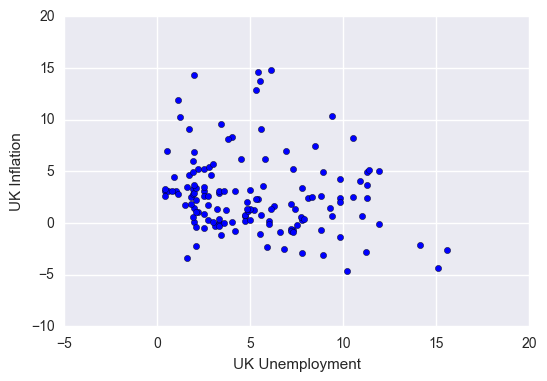

In [8]:
plt.scatter(Overall['UK Unemployment'], Overall['UK Inflation'])
plt.xlabel('UK Unemployment')
plt.ylabel('UK Inflation')

In [40]:
#Clustering

from scipy.cluster import vq
OverallUKUI=Overall.ix[:, ['UK Inflation','UK Unemployment']]

battles = np.vstack(OverallUKUI)
centroids, variance  = vq.kmeans(OverallUKUI, 4)
identified, distance = vq.vq(OverallUKUI, centroids)

cluster_1 = OverallUKUI[identified == 0]
cluster_2 = OverallUKUI[identified == 1]
cluster_3 = OverallUKUI[identified == 2]
cluster_4 = OverallUKUI[identified == 3]

print(cluster_1[0:13])
print(cluster_2[0:13])
print(cluster_3[0:13])
print(cluster_4[0:13])


      UK Inflation  UK Unemployment
Year                               
1879          -4.6             10.2
1884          -2.9              7.8
1885          -3.1              8.9
1886          -1.4              9.8
1887          -0.7              7.3
1893          -0.6              7.2
1894          -0.9              6.6
1908           0.3              7.8
1909           0.6              7.7
1921          -9.0             11.3
1922         -15.0              9.8
1923          -6.2              8.1
1924          -0.8              7.2
      UK Inflation  UK Unemployment
Year                               
1872           4.5              0.9
1873           3.1              1.0
1880           3.2              5.0
1900           5.2              2.5
1912           2.9              3.3
1919           9.6              3.4
1939           6.2              5.8
1941          10.3              1.2
1942           7.0              0.5
1943           3.3              0.4
1944           2.6          

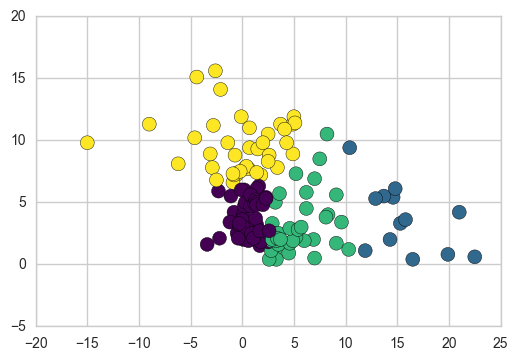

In [78]:
plt.scatter(OverallUKUI.ix[:,0], OverallUKUI.ix[:,1], s=100, c=identified, cmap='viridis_r')

In [46]:
#Clustering

from scipy.cluster import vq
OverallUSUI=Overall.ix[:, ['US Inflation','US Unemployment']]

battles = np.vstack(OverallUSUI)
centroids, variance  = vq.kmeans(OverallUSUI, 4)
identified, distance = vq.vq(OverallUSUI, centroids)

cluster_1 = OverallUSUI[identified == 0]
cluster_2 = OverallUSUI[identified == 1]
cluster_3 = OverallUSUI[identified == 2]
cluster_4 = OverallUSUI[identified == 3]

print(cluster_1[0:13])
print(cluster_2[0:13])
print(cluster_3[0:13])
print(cluster_4[0:13])



      US Inflation  US Unemployment
Year                               
1958           2.8              6.8
1970           5.7              5.0
1971           4.4              6.0
1973           6.2              4.9
1976           5.8              7.7
1977           6.5              7.0
1982           6.2              9.7
1983           3.2              9.6
1984           4.3              7.5
1985           3.6              7.2
1987           3.6              6.2
1988           4.1              5.5
1989           4.8              5.3
      US Inflation  US Unemployment
Year                               
1956           1.5              4.1
1957           3.3              4.3
1965           1.6              4.5
1966           2.9              3.8
1967           3.1              3.8
1968           4.2              3.6
1969           5.5              3.5
1972           3.2              5.6
1995           2.8              5.6
1996           3.0              5.4
1997           2.3          

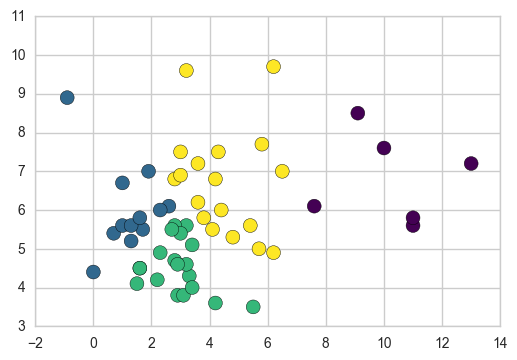

In [47]:
plt.scatter(OverallUSUI.ix[:,0], OverallUSUI.ix[:,1], s=100, c=identified, cmap='viridis_r')
#plt.scatter(centroids[:,1], centroids[:,2], s=1000)

In [3]:
OverallUK.head()

,UK Base Rate,UK Inflation,UK Unemployment
Year,,,
1871,3.0,1.7,1.518761
1872,5.0,4.5,0.890913
1873,5.5,3.1,1.020809
1874,6.0,-3.4,1.554621
1875,4.0,-2.2,2.081238


In [11]:
for n in OverallUK['UK Unemployment']['Year']:
    if n < '2':
        OverallUK['UK Unemployment']['Year']='ya'
return OverallUK
        
    

SyntaxError: 'return' outside function (<ipython-input-11-cae291818f91>, line 4)

In [18]:
OverallUK.head()

,UK Base Rate,UK Inflation,UK Unemployment,Group
Year,,,,
1871,3.0,1.7,1.518761,Weak
1872,5.0,4.5,0.890913,Steady
1873,5.5,3.1,1.020809,Weak
1874,6.0,-3.4,1.554621,Weak
1875,4.0,-2.2,2.081238,Weak


In [27]:
OverallUK=OverallUK.groupby('Group')

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [60]:

OverallUK.loc[OverallUK['UK Unemployment']<5, 'Group']='Steady'
OverallUK.loc[OverallUK['UK Unemployment']>5 & (OverallUK['UK Unemployment']<10),'Group']='Weak'
OverallUK.head()

,UK Base Rate,UK Inflation,UK Unemployment,Group
Year,,,,
1871,3.0,1.7,1.5,Weak
1872,5.0,4.5,0.9,Steady
1873,5.5,3.1,1.0,Steady
1874,6.0,-3.4,1.6,Weak
1875,4.0,-2.2,2.1,Weak


In [ ]:
sns.swarmplot(x="one", y="two", data=df, hue="key1", size=10)

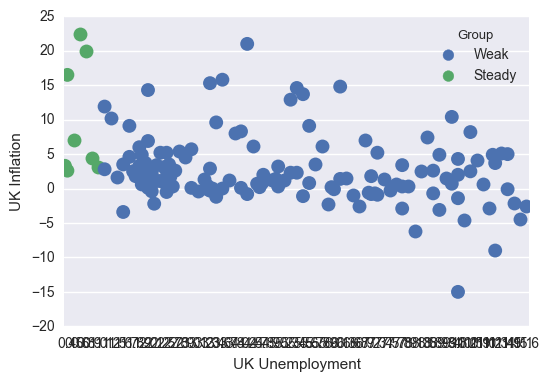

In [46]:
sns.swarmplot('UK Unemployment', 'UK Inflation', data=OverallUK, hue='Group',
              size=10)

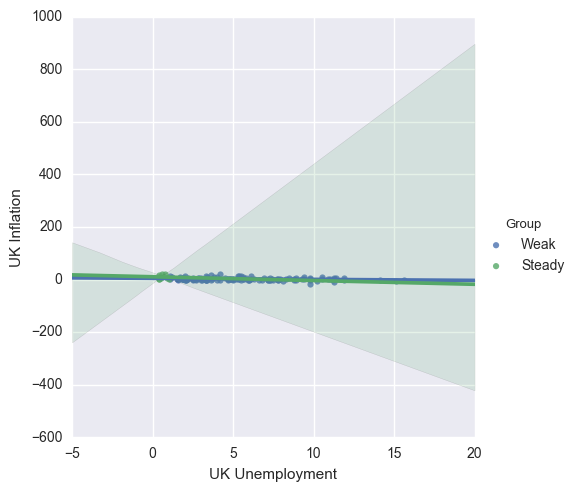

In [48]:
sns.lmplot('UK Unemployment', 'UK Inflation', data=OverallUK, 
           hue='Group')

KeyError: 'Group'

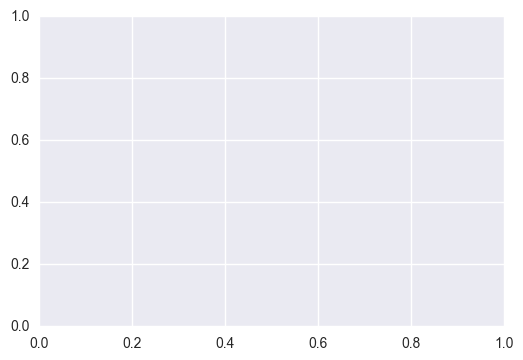

In [4]:
fig, ax = plt.subplots()
colors = {'Steady':'red', 'Weak':'blue'}
grouped=OverallUK.groupby('Group')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='UK Inflation', y='UK Unemployment',
               label=key, color = colors[key], s=100)